# Relatório: Treinamento da Rede YOLOv5 para Classificação de Resíduos de Bebidas

Neste documento, apresento a resolução de um projeto de criação de uma base de dados e treinamento da rede YOLOv5, parte do bootcamp BairesDev - Machine Learning Practitioner.

## Como funciona a classificação de imagens

A YOLO (“You Only Look Once”) é uma rede neural convolucional projetada para a detecção de objetos em tempo real. Sua arquitetura se destaca pela eficiência e rapidez.O processo de classificação de imagens para modelos como o [YOLOv5](https://github.com/ultralytics/yolov5/tree/206af8d6505e45bd0d56942f297e59ab3934720a) envolve as seguintes etapas principais:

 - Coleta de Dados: Um conjunto de imagens contendo os objetos de interesse é reunido. Cada imagem deve ter suas áreas de interesse rotuladas com caixas delimitadoras (“bounding boxes”).

- Anotações: Cada caixa delimitadora é representada por coordenadas normalizadas (x, y, largura, altura) e pela classe correspondente. Essas anotações são salvas em arquivos .txt no formato YOLO.

- Treinamento: A rede utiliza as imagens e anotações para aprender a localizar e classificar os objetos. Durante o treinamento, o modelo ajusta seus pesos para minimizar erros, utilizando otimização baseada em gradiente.

- Validação e Teste: Um conjunto de dados separado é usado para avaliar o desempenho do modelo.

## Processo de Criação e Rotulação da Base de Dados

A criação e rotulação da base de dados é uma etapa fundamental, pois define as áreas de interesse nas imagens. Durante o treinamento, essas áreas auxiliam a rede a reconhecer os objetos em novas imagens. Para entender melhor o processo, realizei rotulações manuais utilizando a ferramenta [LabelImg](https://github.com/HumanSignal/labelImg). Apesar de ser uma experiência educativa, rotular centenas de imagens manualmente seria inviável para treinamento. Por isso, optei por utilizar um dataset pronto do [Kaggle: Drink Waste Classification](https://www.kaggle.com/datasets/arkadiyhacks/drinking-waste-classification?resource=download). Esse conjunto de dados contém milhares de imagens de diferentes tipos de garrafas, já etiquetadas com as classes correspondentes.

## Treinamento do Modelo YOLOv5

Para o treinamento, utilizei a rede [YOLOv5](https://github.com/ultralytics/yolov5/tree/206af8d6505e45bd0d56942f297e59ab3934720a). Primeiramente, clonei o repositório oficial e instalei as dependências necessárias, conforme arquivo README.

```
$ git clone https://github.com/ultralytics/yolov5
$ cd yolov5
$ pip install -r requirements.txt
```
Depois de clonar o repositório, separei as imagens em duas classes de interesse: alumínio e vidro. Em seguida, criei um arquivo data.yaml para configurar os caminhos da base de dados e as classes. Finalmente, iniciei o treinamento com o seguinte comando:


```
python train.py --img 640 --batch 16 --epochs 50 --data data.yaml --weights yolov5m.pt --device 0 --cache --workers 8
```
Posteriormente, testei o modelo utilizando um conjunto de validação:

```
python val.py --data data.yaml --weights runs/train/exp3/weights/best.pt --img 640 --conf 0.25
```
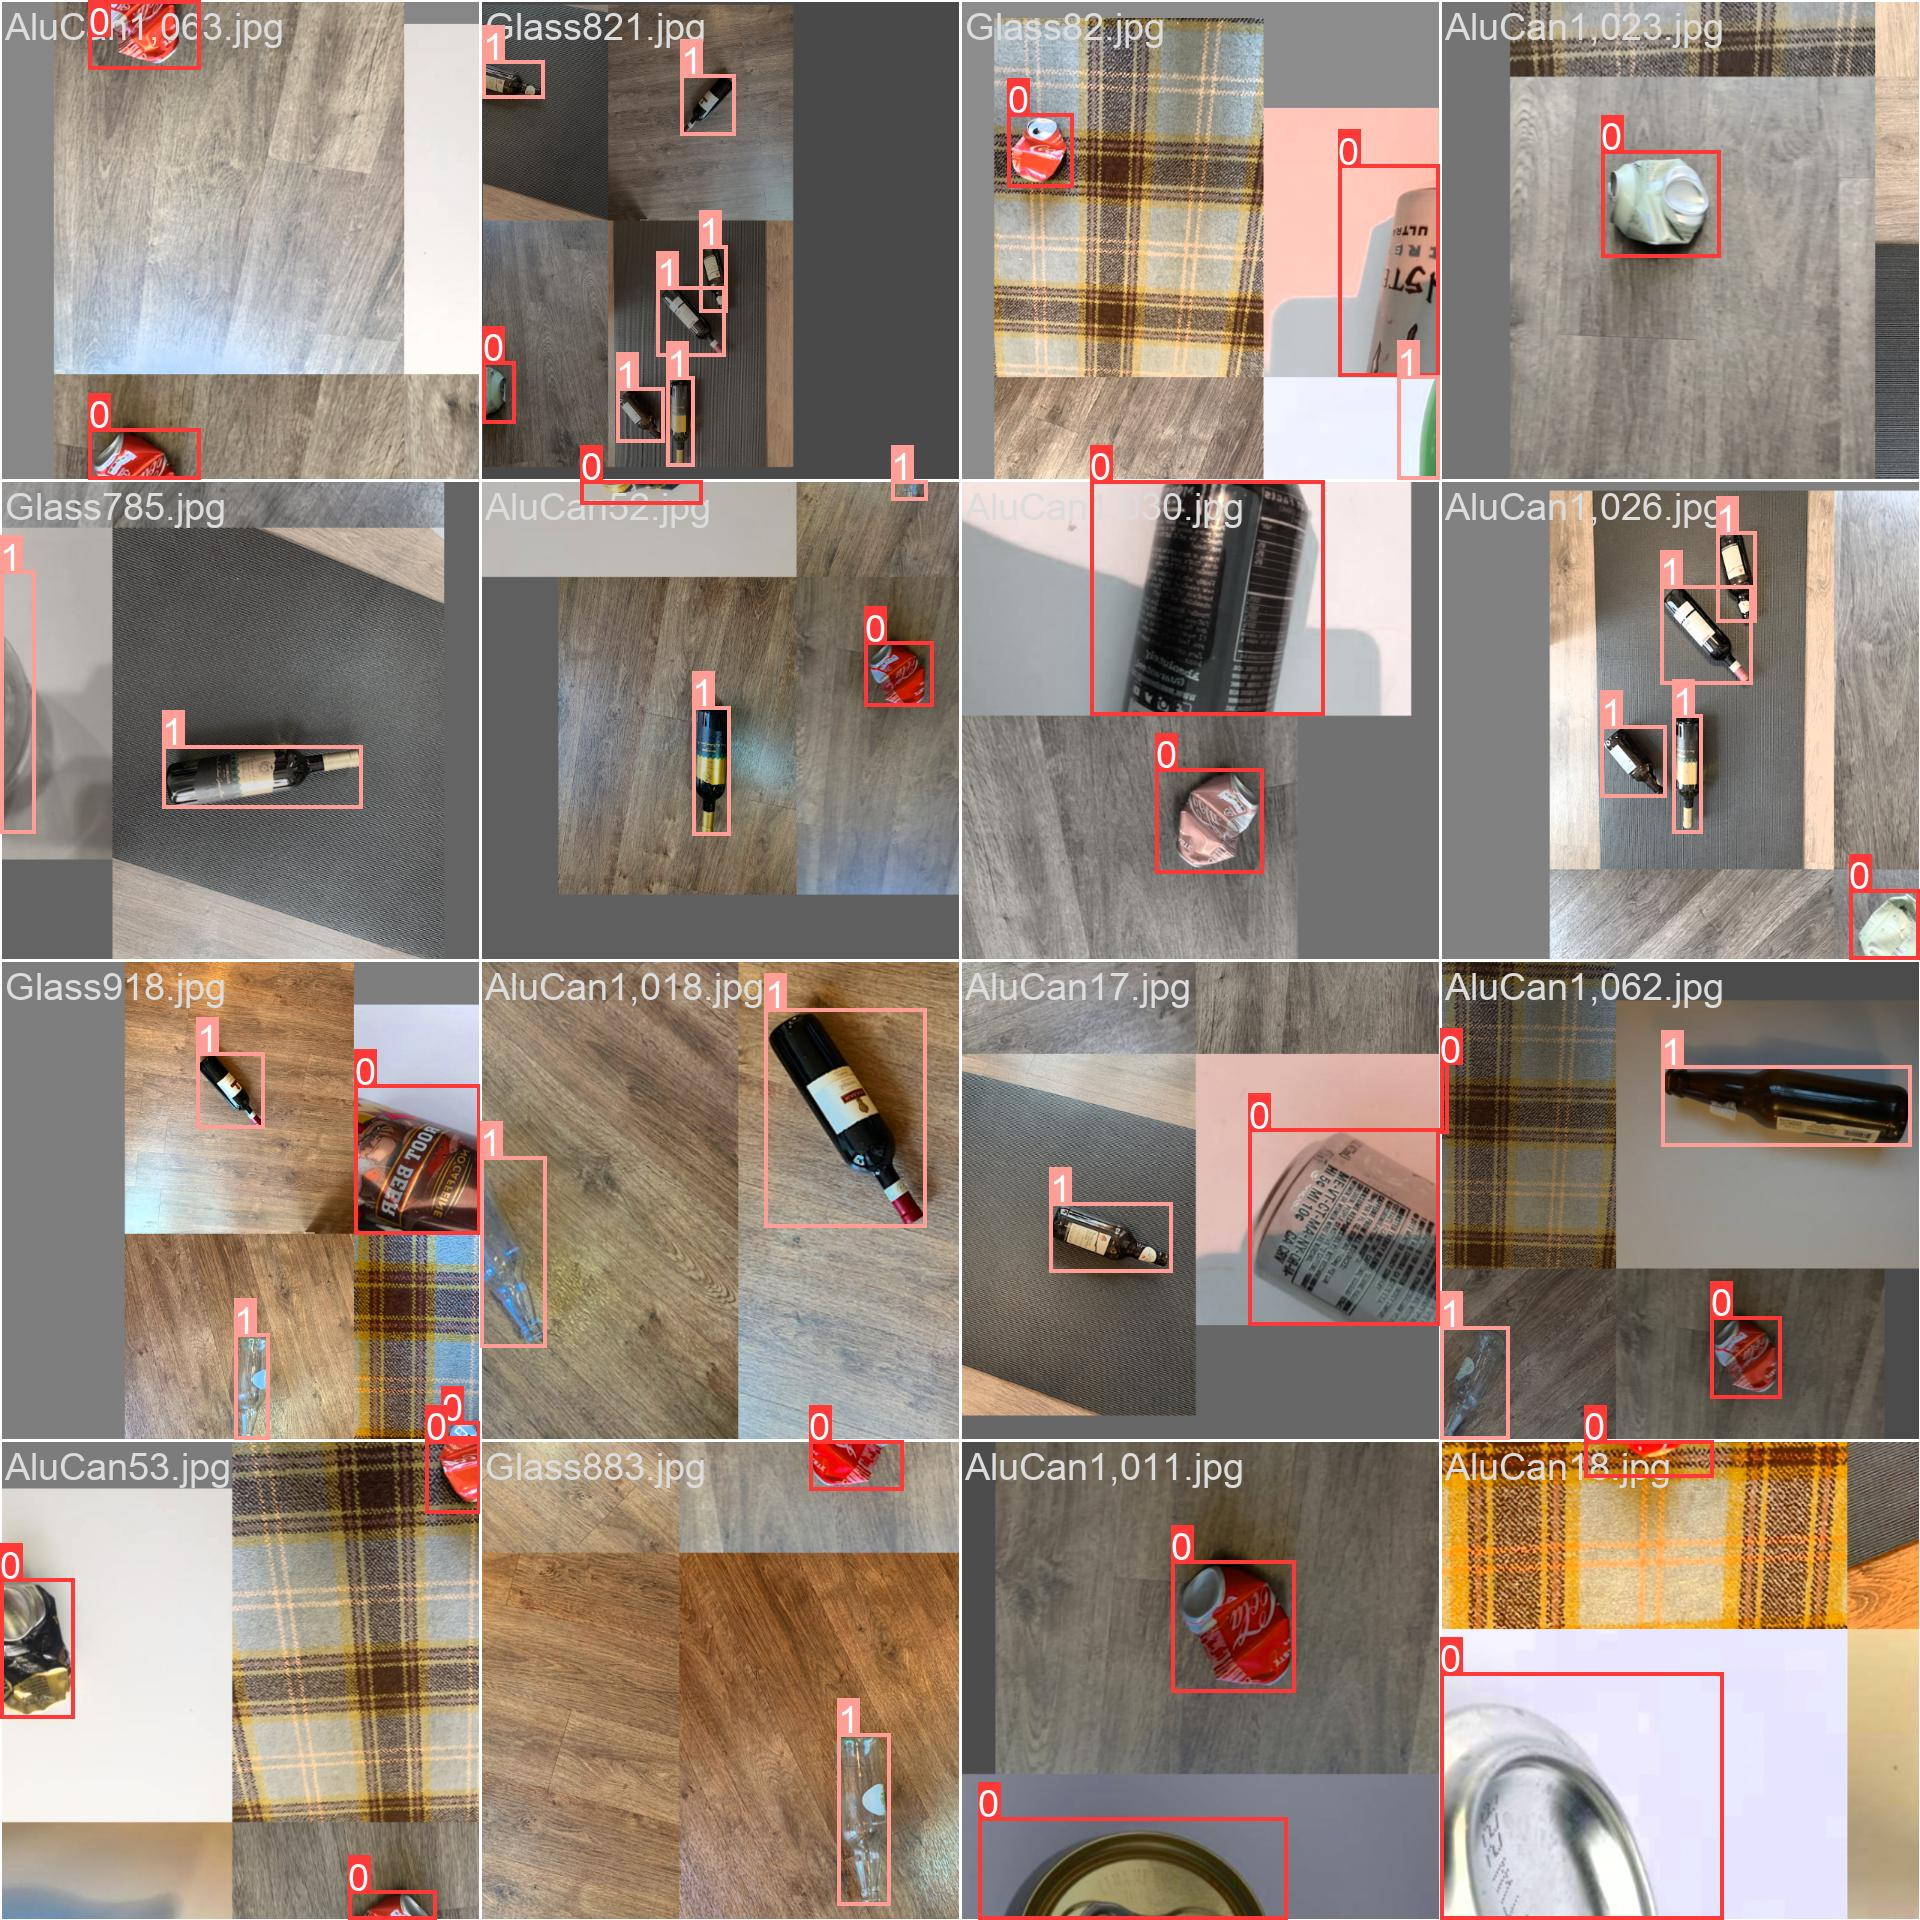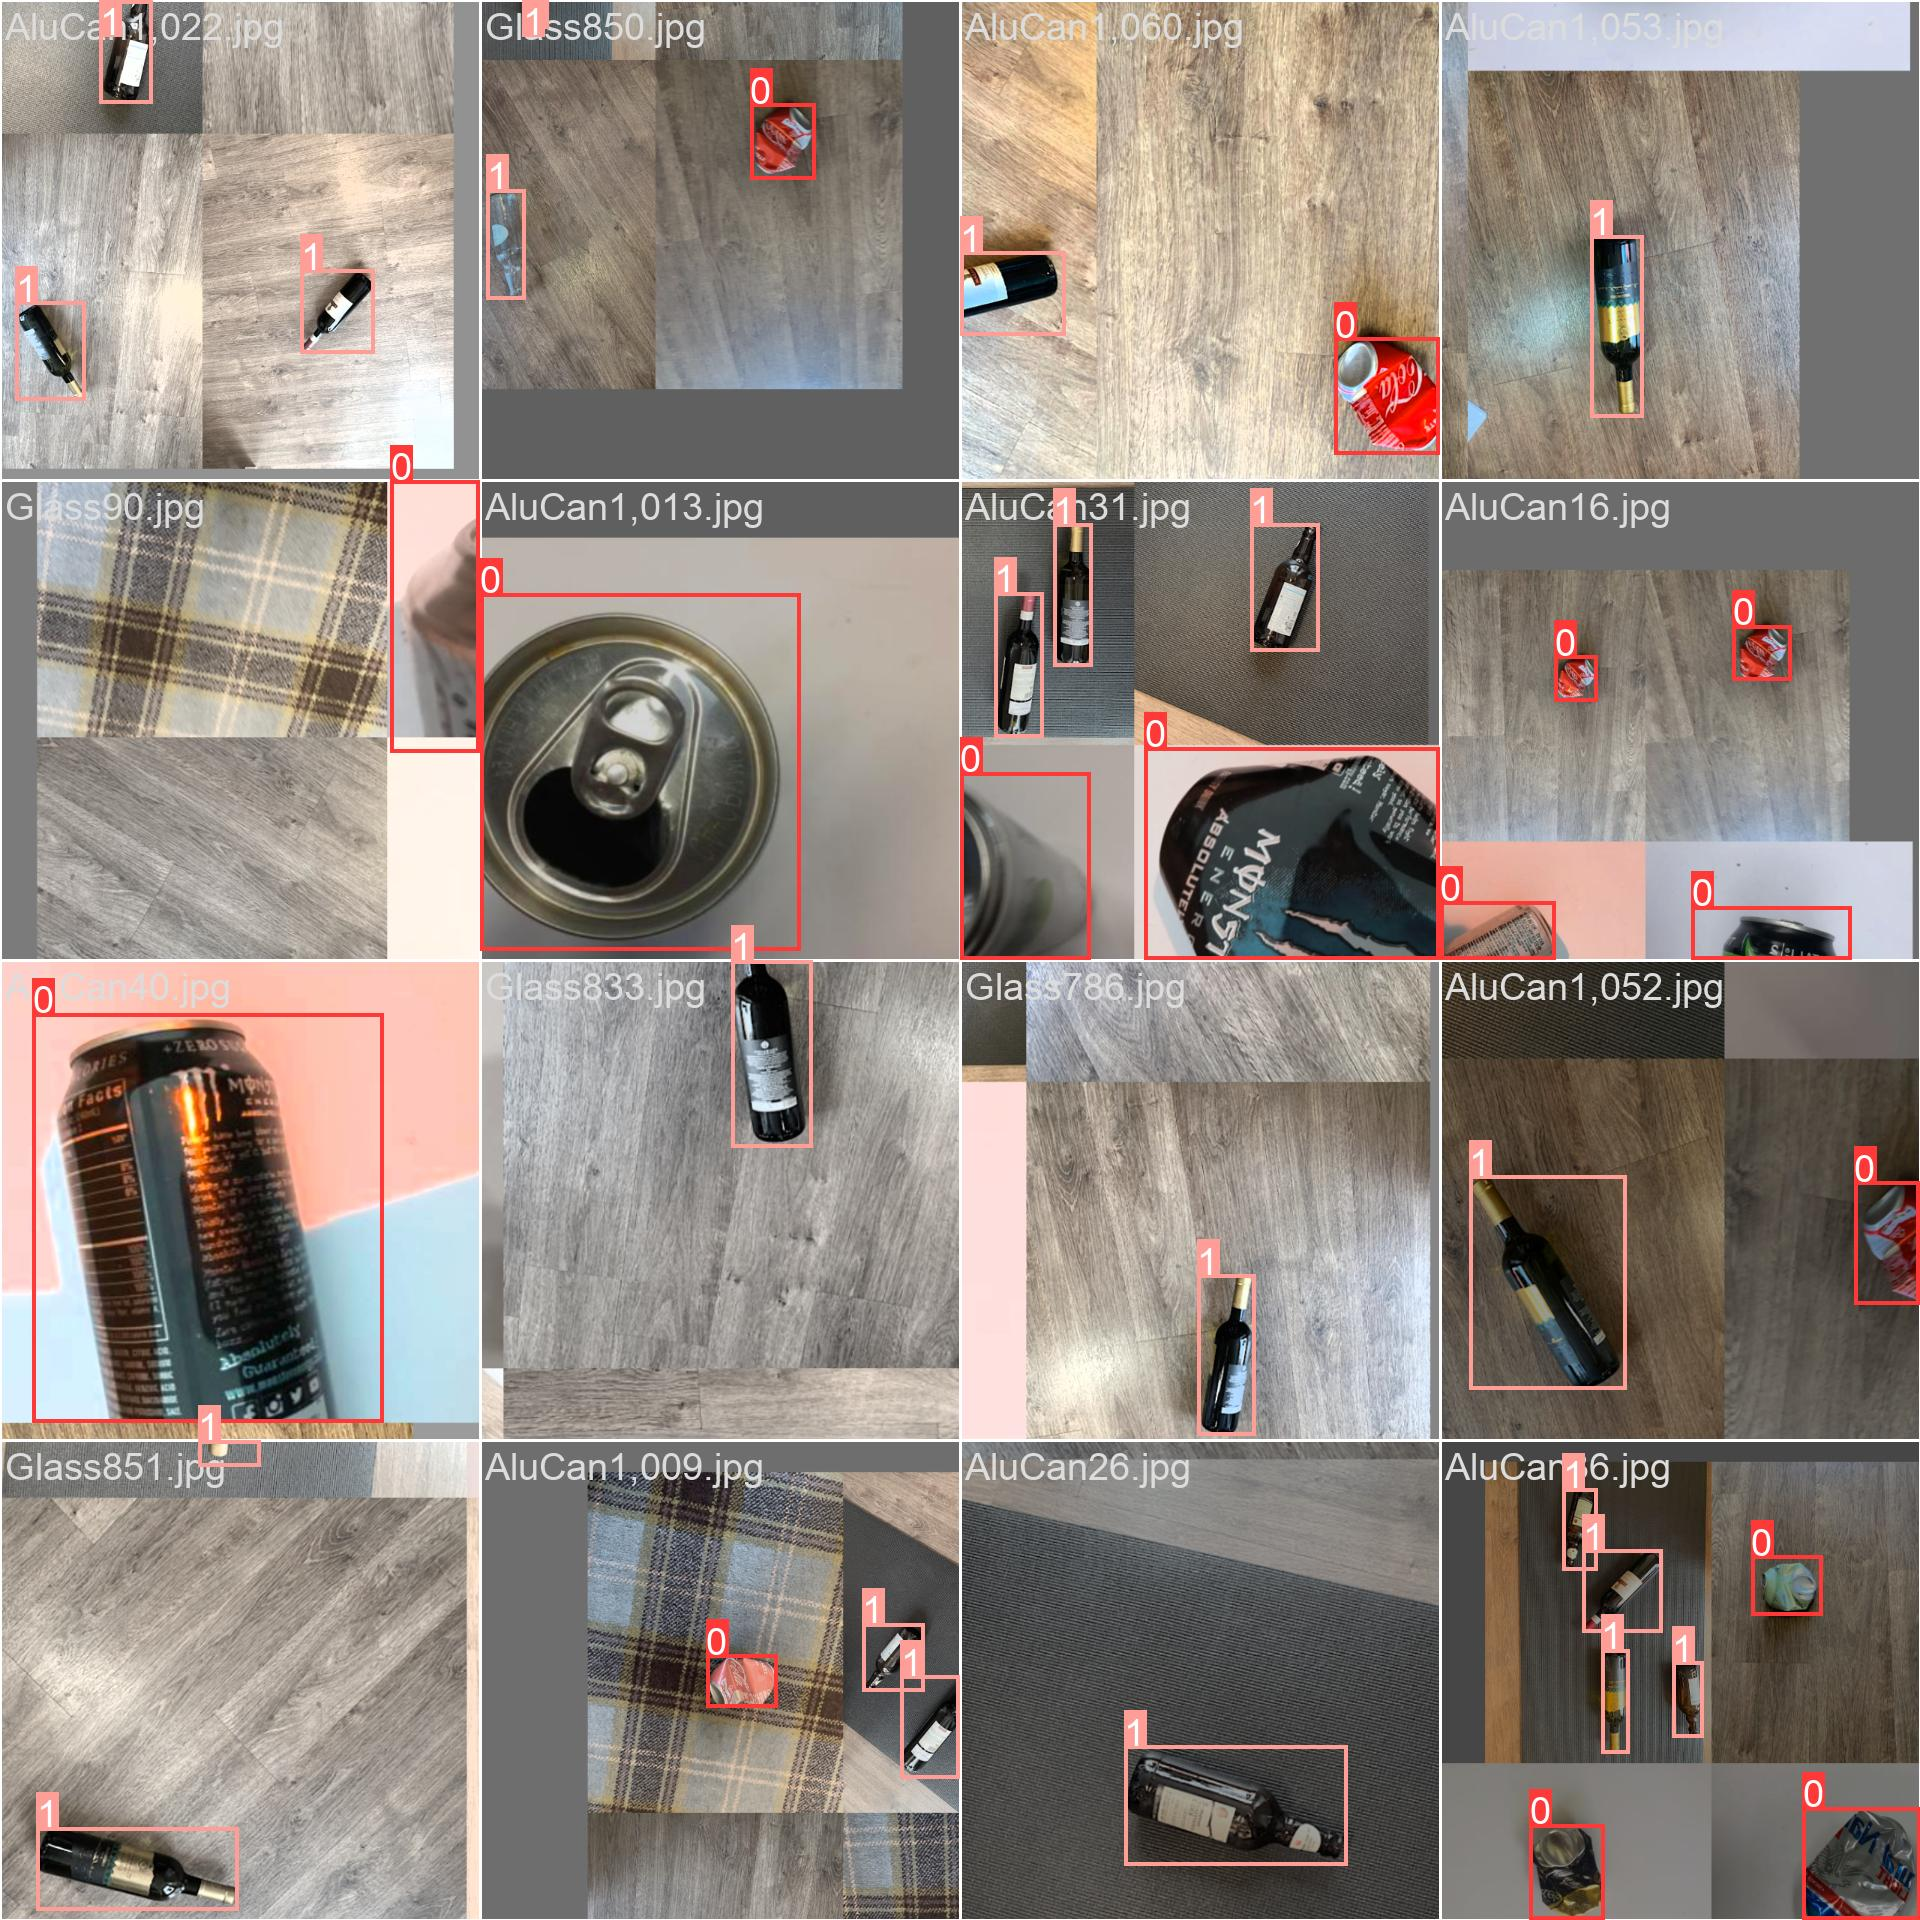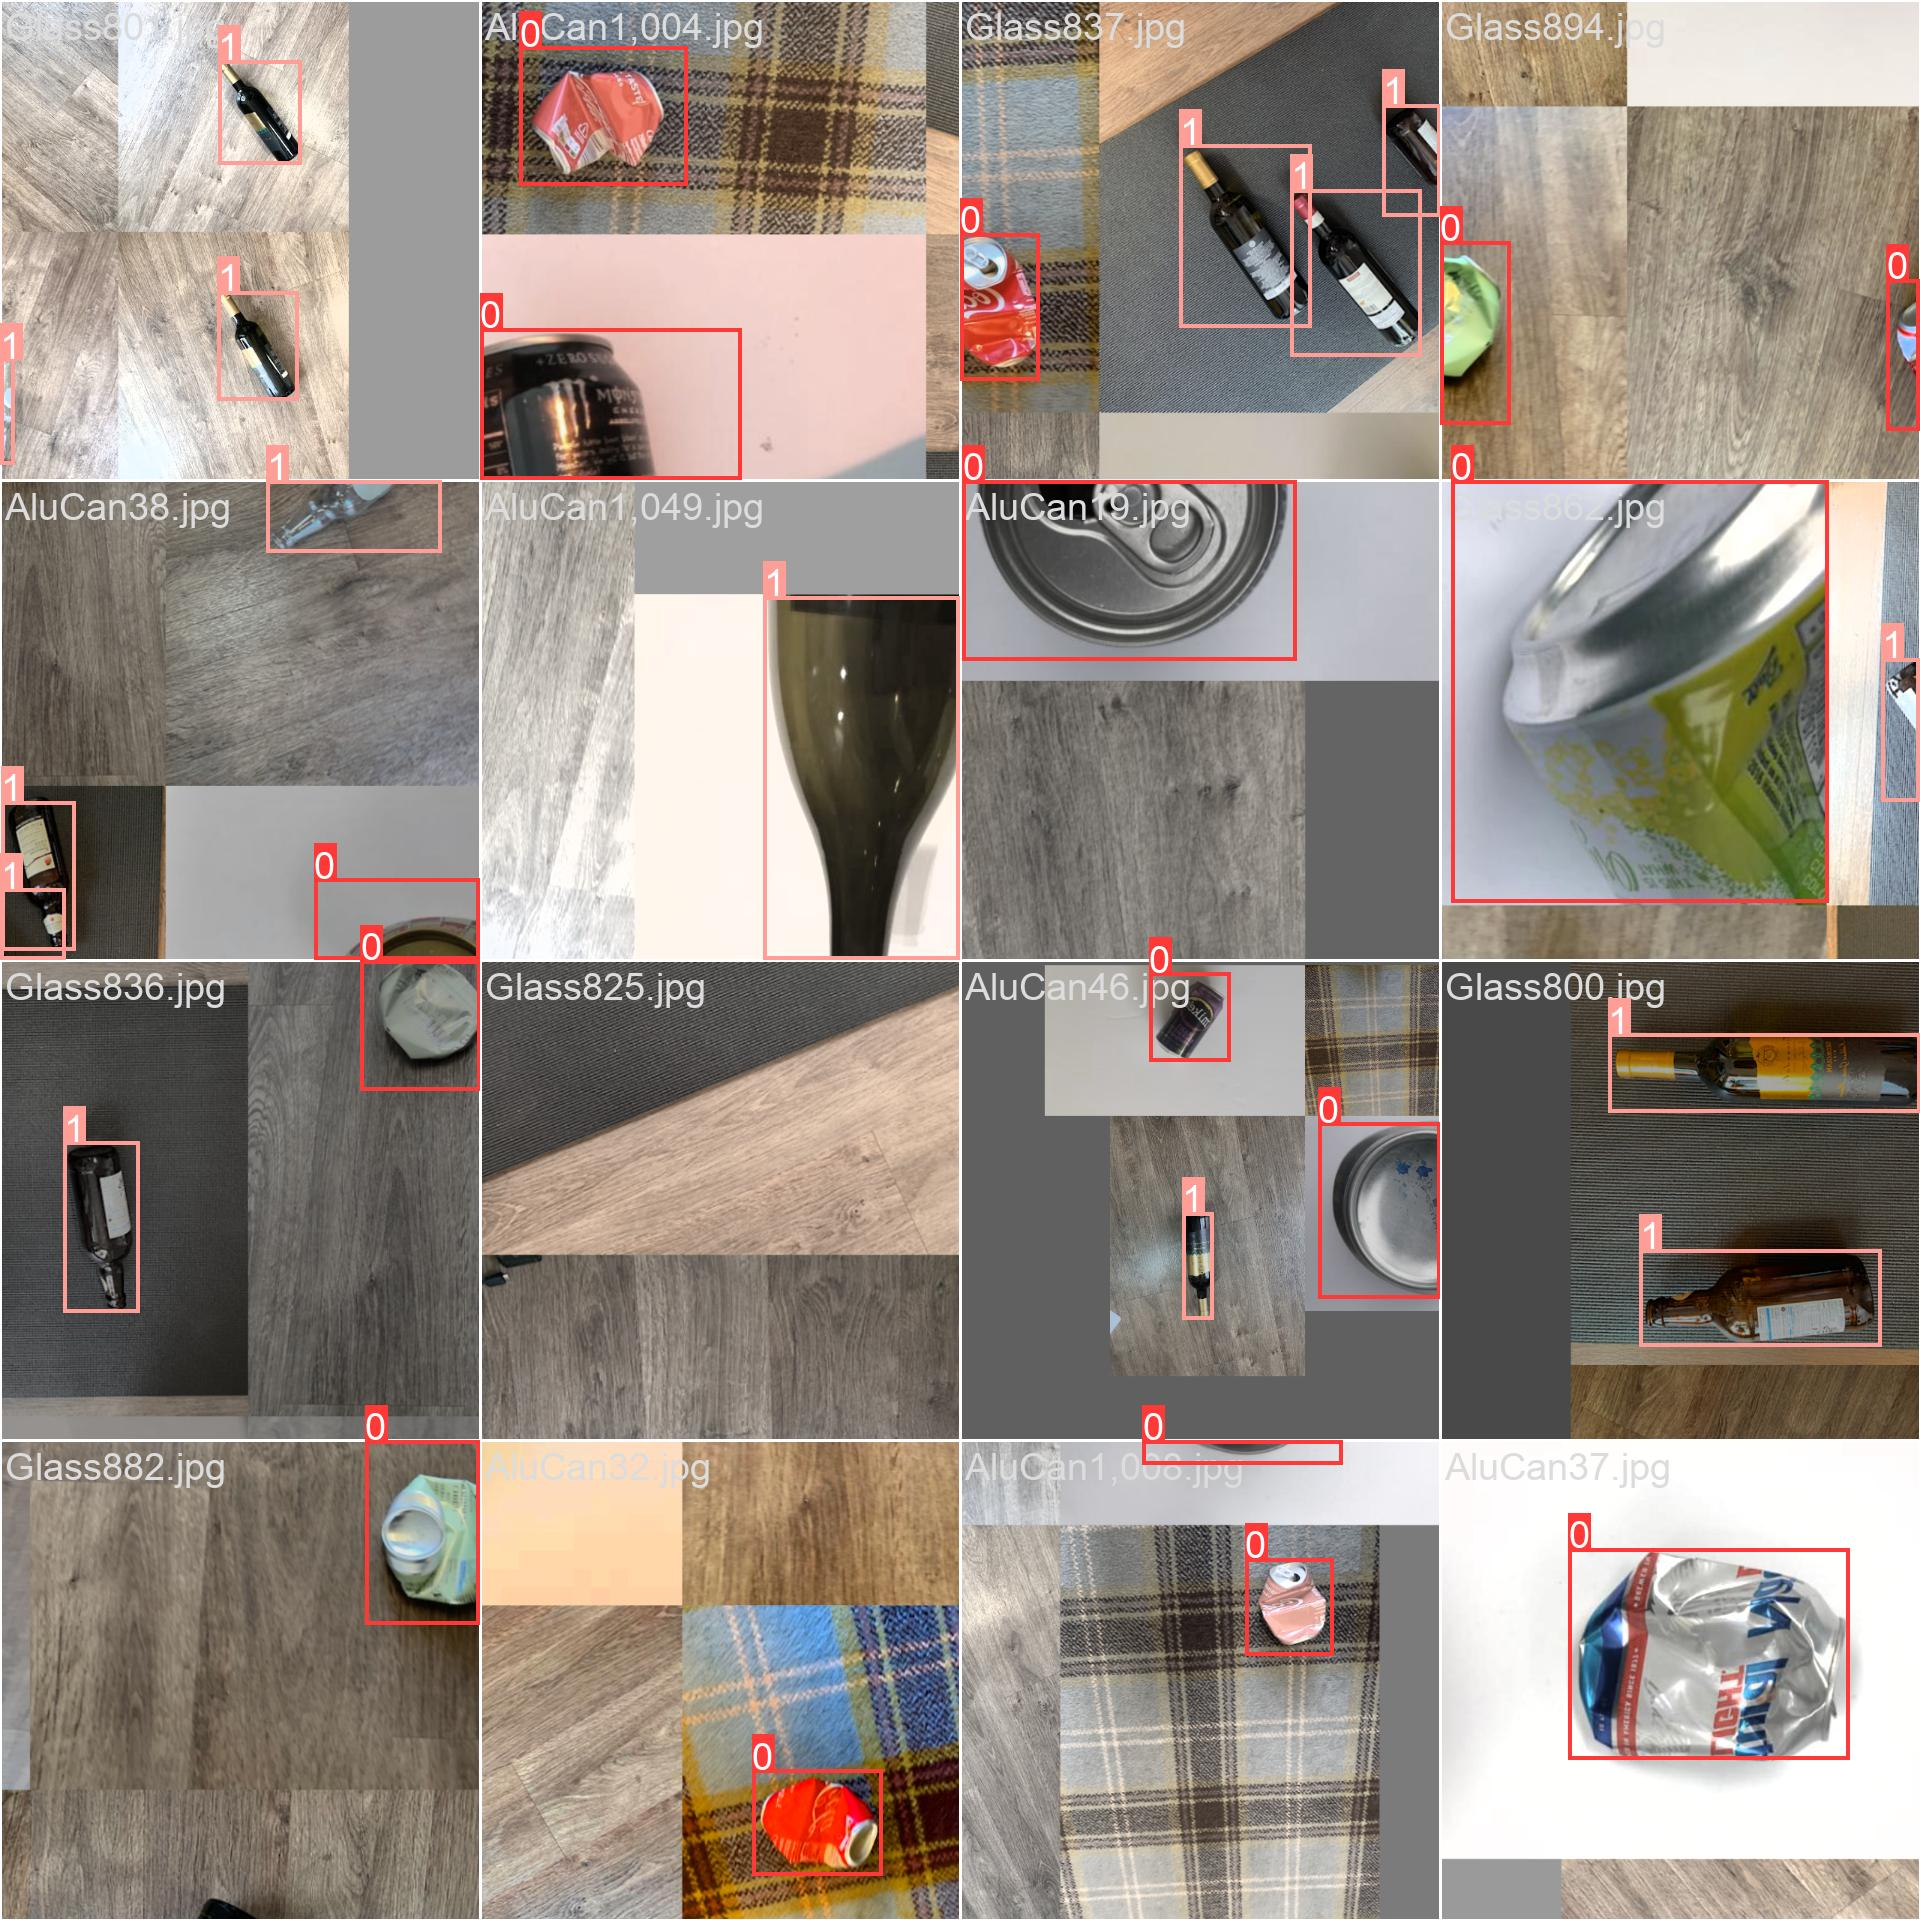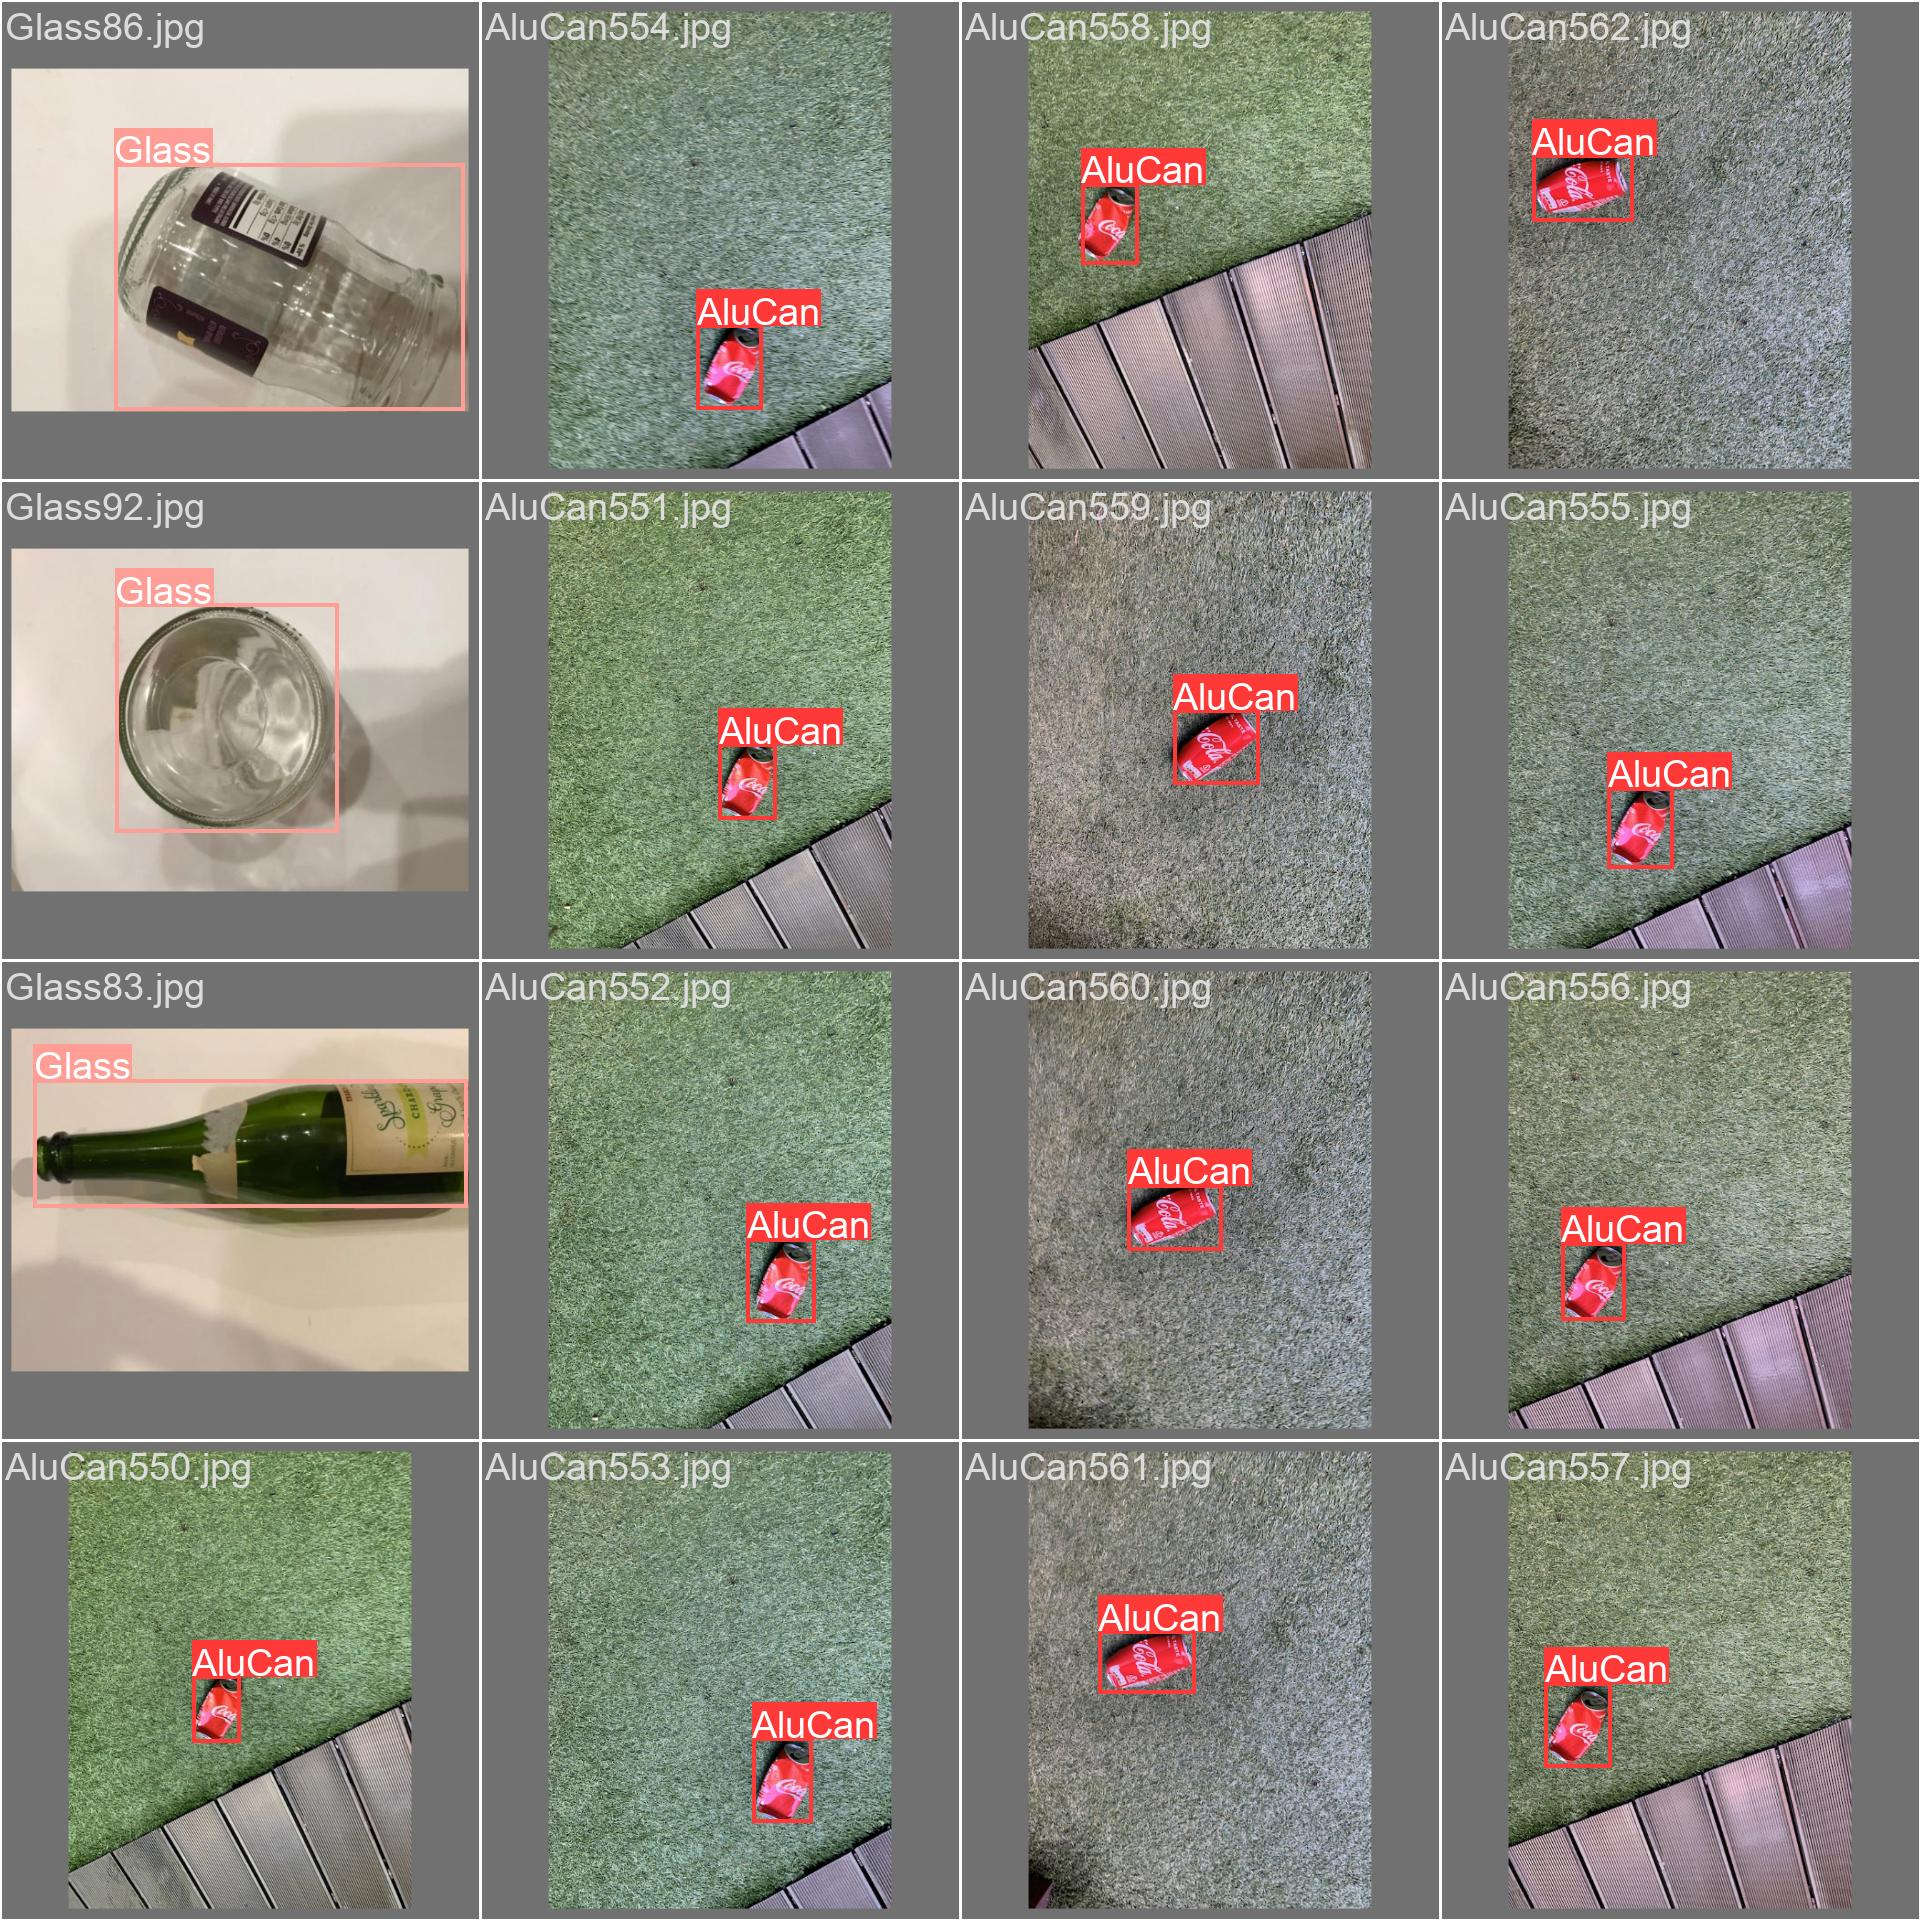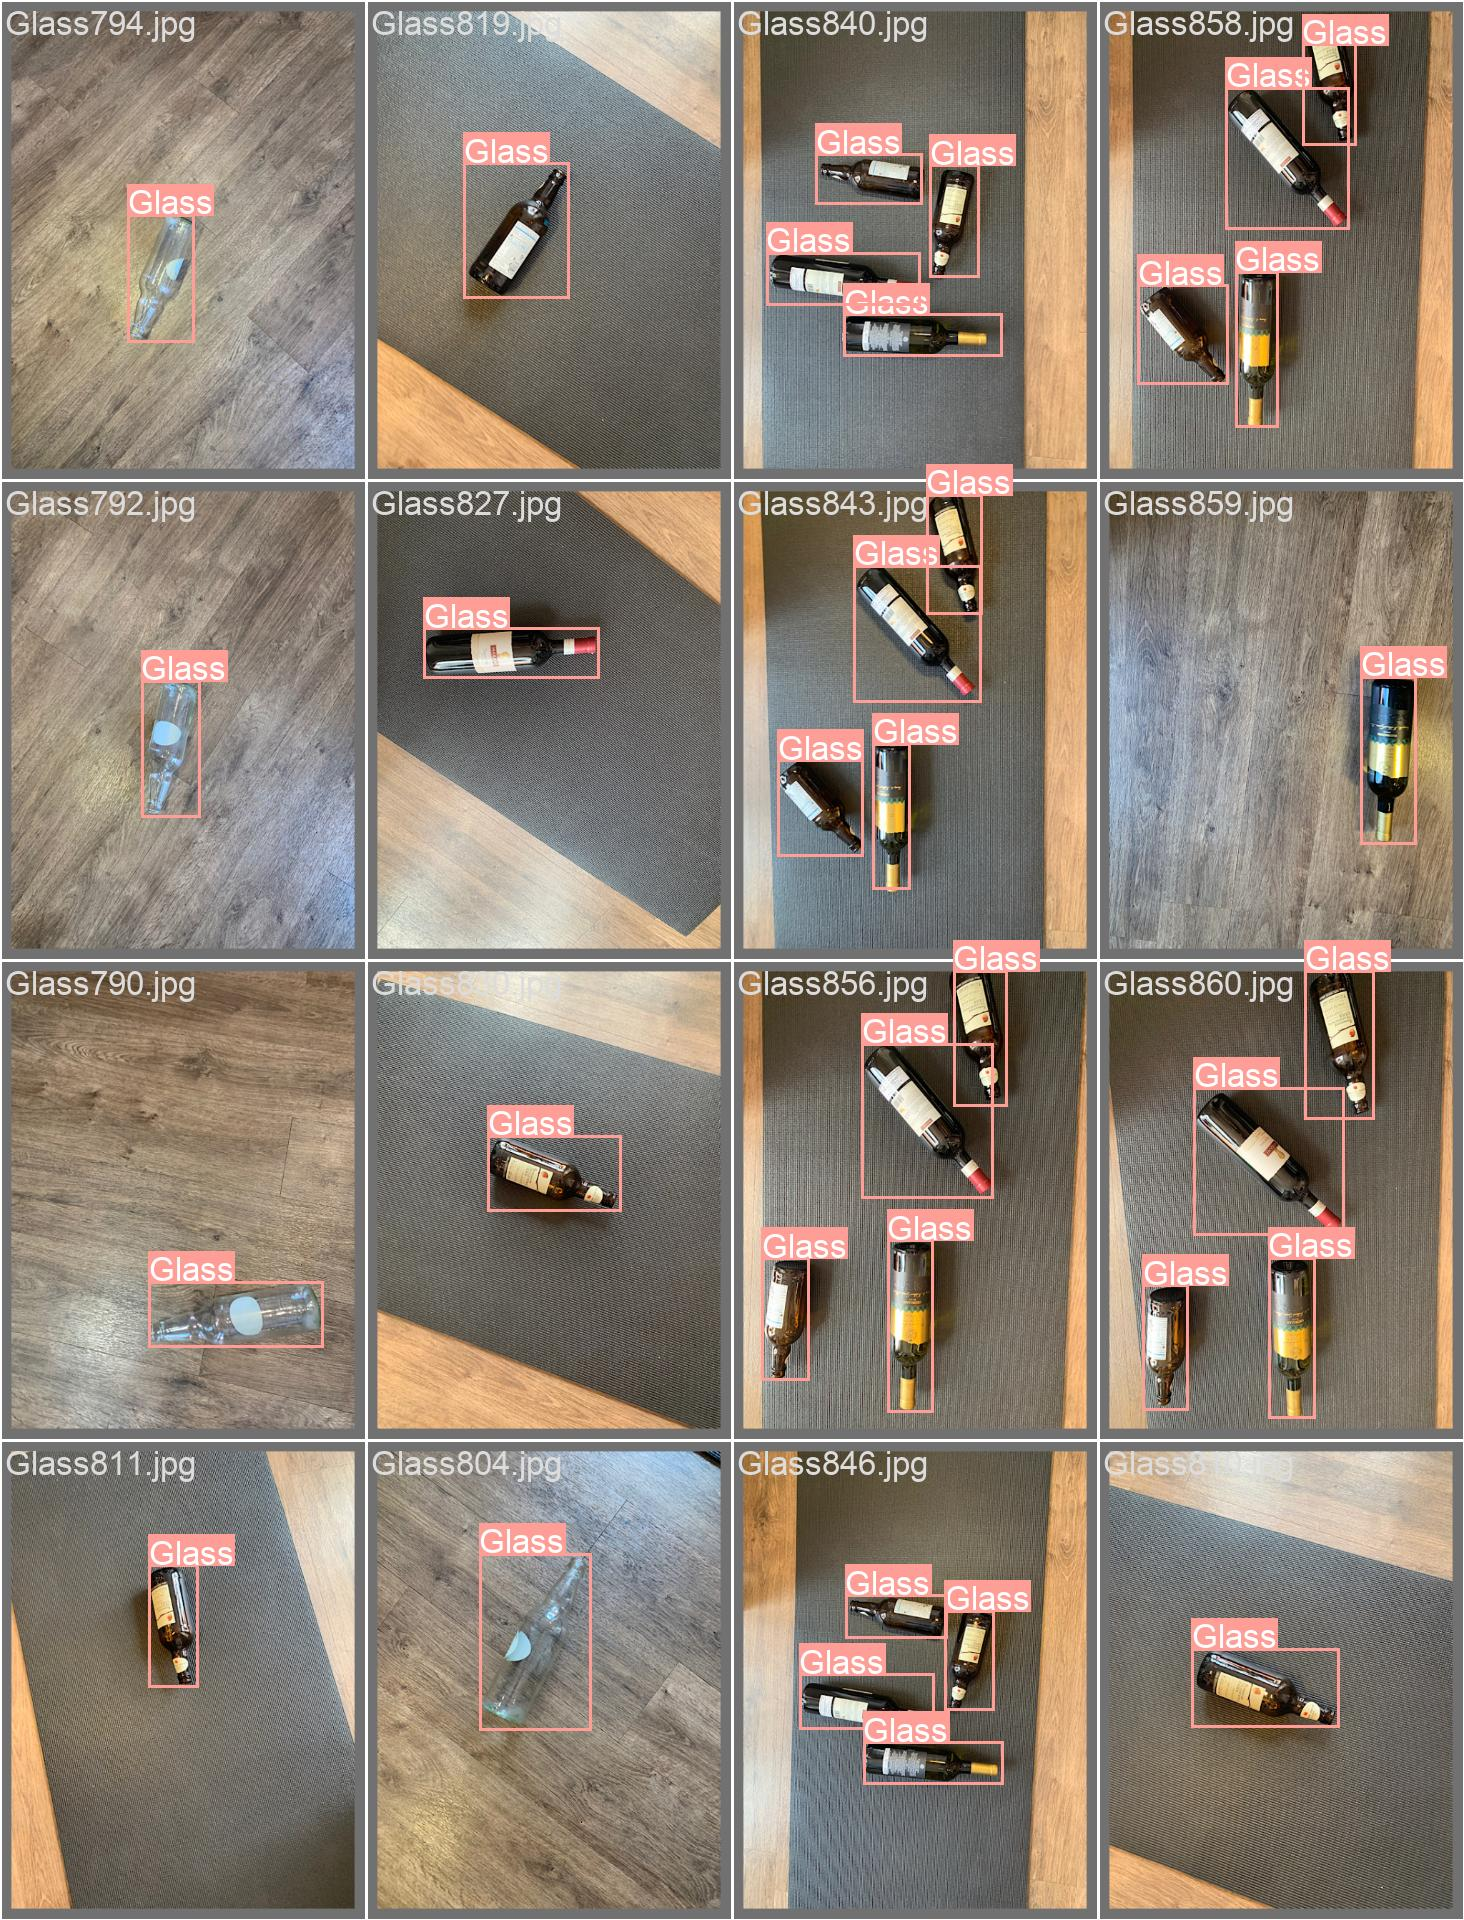



## Resultados e Impacto

O modelo treinado apresentou bom grau de acurácia e precisão para detecção das classes alumínio e vidro. Esse tipo de solução pode trazer benefícios às pessoas que trabalham com coleta e reciclagem de lixo, como:

- Alertar a presença de garrafas de vidro no meio do lixo.

- Reduzir desperdícios ao garantir que latinhas de alumínio não passem despercebidas.

Este projeto demonstra como as redes YOLO podem ser aplicadas para resolver problemas reais, como classificação de lixo reciclável. Com ajustes adicionais e integração com sistemas de coleta, soluções como essa podem aumentar a eficiência no manejo de resíduos e contribuir para a sustentabilidade.


